In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Flatten, Reshape, LeakyReLU
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [2]:
img_rows = 28
img_cols = 28
channels = 1

img_shape = (img_rows, img_cols, channels)
z_dim = 100

In [3]:
def build_generator(img_shape,z_dim):
    model = Sequential()
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dense(np.prod(img_shape),activation='tanh'))
    model.add(Reshape(img_shape))
    return model

In [4]:
def build_discriminator(img_shape):
    model = Sequential()
    model.add(Flatten(input_shape = img_shape))
    model.add(Dense(128))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dense(1,activation='sigmoid'))
    return model

In [5]:
def build_gan(generator,discriminator):
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    return model

In [6]:
discriminator = build_discriminator(img_shape)
discriminator.compile(loss='binary_crossentropy',optimizer=Adam(),metrics=['accuracy'])
generator = build_generator(img_shape,z_dim)
discriminator.trainable = False

gan = build_gan(generator,discriminator)
gan.compile(loss='binary_crossentropy',optimizer=Adam())

In [7]:
def sample_images(generator, image_grid_rows=4,image_grid_columns=4):
    z = np.random.normal(0,1,(image_grid_rows * image_grid_columns,z_dim))
    
    gen_imgs = generator.predict(z)
    gen_imgs = 0.5 * gen_imgs + 0.5
    fig,axs = plt.subplots(image_grid_rows,image_grid_columns,figsize=(4,4),sharey=True,sharex=True)
    
    cnt = 0
    for i in range(image_grid_rows):
        for j in range(image_grid_columns):
            axs[i,j].imshow(gen_imgs[cnt,:,:,0], cmap='gray')
            axs[i,j].axis('off')
            cnt+=1

In [8]:
losses = []
accuracies = []
iteration_checkpoints = []

def train(iterations,batch_size,sample_interval):
    (x_train,_),(_,_) = mnist.load_data()
    x_train = x_train / 127.5-1.0
    x_train = np.expand_dims(x_train, axis=3)
    real = np.ones((batch_size,1))
    fake = np.zeros((batch_size,1))
    
    for iteration in range(iterations):
        idx = np.random.randint(0,x_train.shape[0],batch_size)
        imgs = x_train[idx]
        
        z= np.random.normal(0,1,(batch_size,100))
        gen_imgs = generator.predict(z)

        d_loss_real = discriminator.train_on_batch(imgs, real)
        d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
        d_loss, accuracy = 0.5 * np.add(d_loss_real,d_loss_fake)
        
        
        g_loss = gan.train_on_batch(z,real)
        
        if (iteration+1) % sample_interval ==0:
            losses.append((d_loss,g_loss))
            accuracies.append(100.0 * accuracy)
            iteration_checkpoints.append(iteration + 1)
            
            print(f"{iteration+1} [D 손실: {d_loss:f}, 정확도: {100.0*accuracy}][G 손실: {g_loss}]")
            sample_images(generator)

1000 [D 손실: 0.000417, 정확도: 100.0][G 손실: 8.225776672363281]
2000 [D 손실: 0.000094, 정확도: 100.0][G 손실: 9.75967788696289]
3000 [D 손실: 0.000025, 정확도: 100.0][G 손실: 11.151529312133789]
4000 [D 손실: 0.000005, 정확도: 100.0][G 손실: 12.5535306930542]
5000 [D 손실: 0.000002, 정확도: 100.0][G 손실: 13.400223731994629]
6000 [D 손실: 0.000000, 정확도: 100.0][G 손실: 15.263416290283203]
7000 [D 손실: 0.000000, 정확도: 100.0][G 손실: 15.529655456542969]
8000 [D 손실: 0.000000, 정확도: 100.0][G 손실: 16.353668212890625]
9000 [D 손실: 0.000000, 정확도: 100.0][G 손실: 17.52477264404297]
10000 [D 손실: 0.000000, 정확도: 100.0][G 손실: 17.42673683166504]
11000 [D 손실: 0.000000, 정확도: 100.0][G 손실: 18.402469635009766]
12000 [D 손실: 0.000000, 정확도: 100.0][G 손실: 18.716388702392578]
13000 [D 손실: 0.000000, 정확도: 100.0][G 손실: 19.04715347290039]
14000 [D 손실: 0.000000, 정확도: 100.0][G 손실: 19.07405662536621]
15000 [D 손실: 0.000000, 정확도: 100.0][G 손실: 21.109760284423828]
16000 [D 손실: 0.621870, 정확도: 91.015625][G 손실: 401.91265869140625]
17000 [D 손실: 0.000572, 정확도: 100.0][G 손

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


22000 [D 손실: 0.000012, 정확도: 100.0][G 손실: 12.207392692565918]
23000 [D 손실: 0.000077, 정확도: 100.0][G 손실: 10.741925239562988]
24000 [D 손실: 0.000010, 정확도: 100.0][G 손실: 14.064193725585938]
25000 [D 손실: 0.001074, 정확도: 100.0][G 손실: 11.758893013000488]
26000 [D 손실: 0.000022, 정확도: 100.0][G 손실: 16.031530380249023]
27000 [D 손실: 0.000043, 정확도: 100.0][G 손실: 15.083508491516113]
28000 [D 손실: 0.000093, 정확도: 100.0][G 손실: 11.271240234375]
29000 [D 손실: 0.002468, 정확도: 100.0][G 손실: 9.406862258911133]
30000 [D 손실: 0.002415, 정확도: 100.0][G 손실: 10.688071250915527]
31000 [D 손실: 0.000021, 정확도: 100.0][G 손실: 18.044340133666992]
32000 [D 손실: 0.129298, 정확도: 96.875][G 손실: 12.766109466552734]
33000 [D 손실: 0.000239, 정확도: 100.0][G 손실: 14.651599884033203]
34000 [D 손실: 0.007739, 정확도: 99.609375][G 손실: 12.166301727294922]
35000 [D 손실: 0.064376, 정확도: 98.046875][G 손실: 13.952224731445312]
36000 [D 손실: 0.000682, 정확도: 100.0][G 손실: 13.502578735351562]
37000 [D 손실: 0.015339, 정확도: 99.21875][G 손실: 14.185928344726562]
38000 [D 손실: 0.0

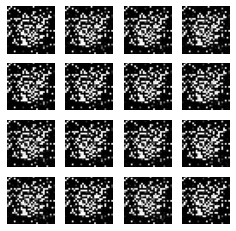

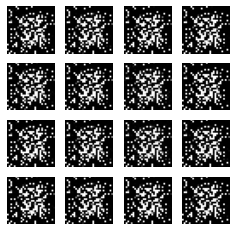

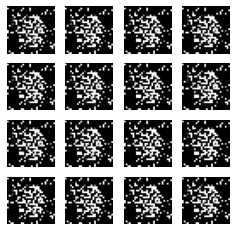

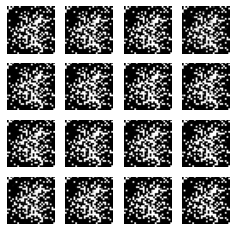

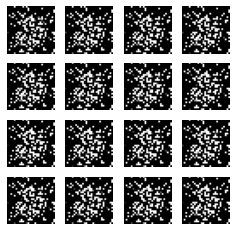

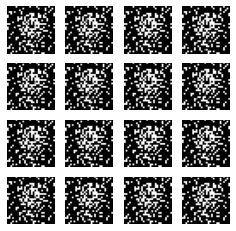

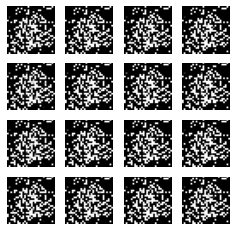

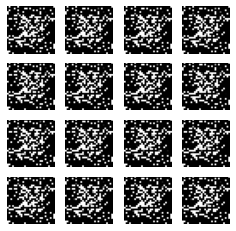

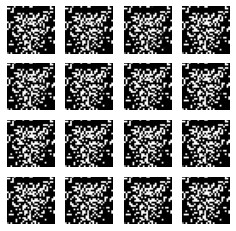

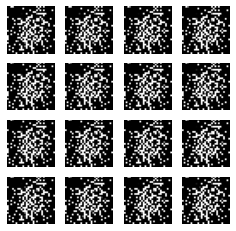

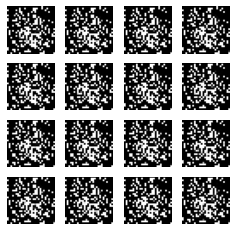

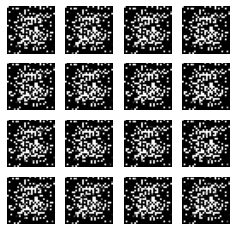

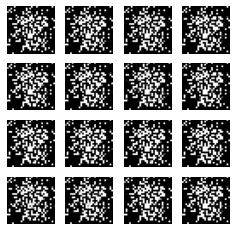

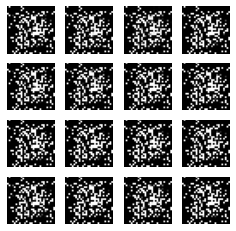

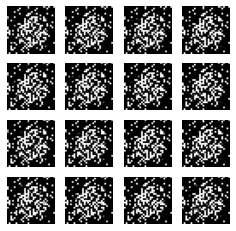

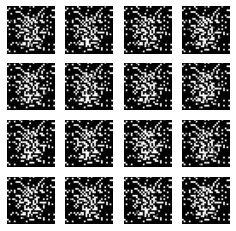

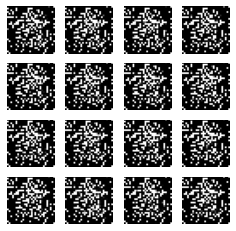

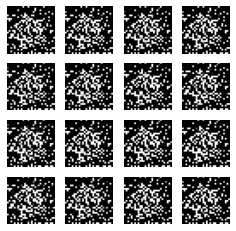

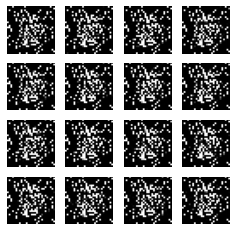

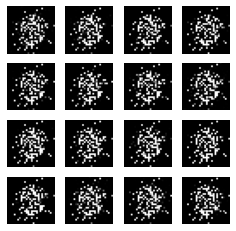

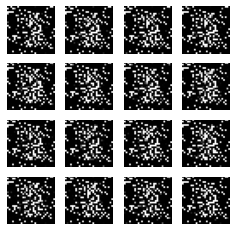

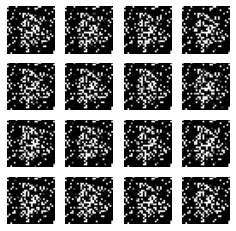

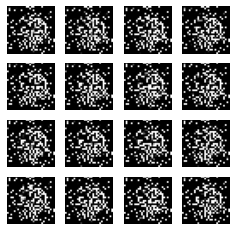

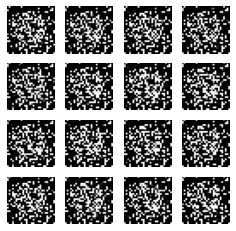

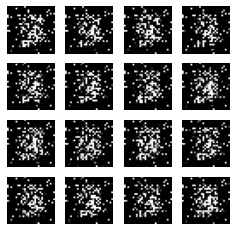

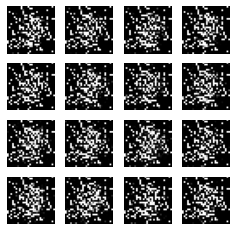

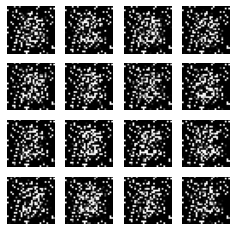

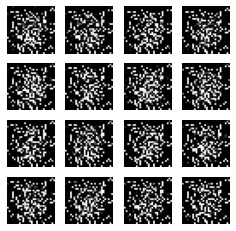

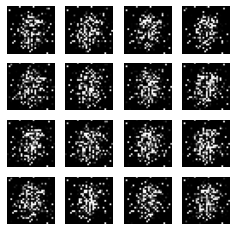

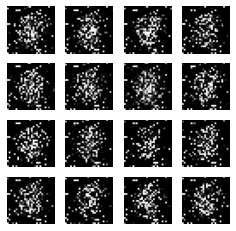

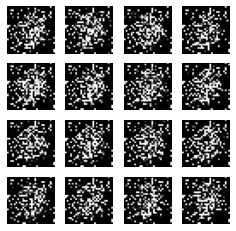

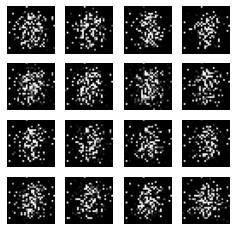

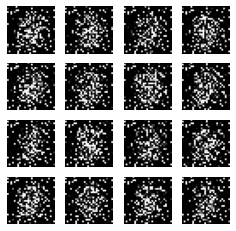

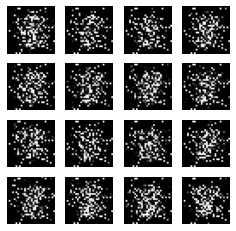

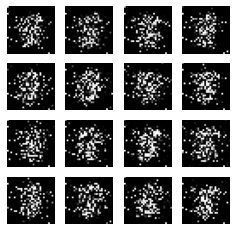

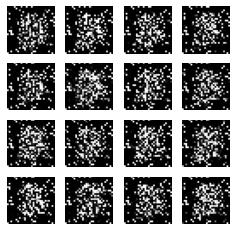

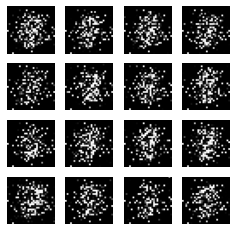

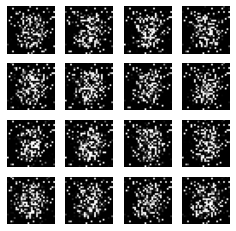

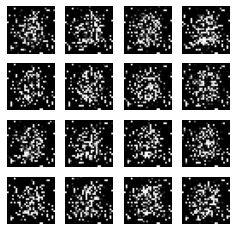

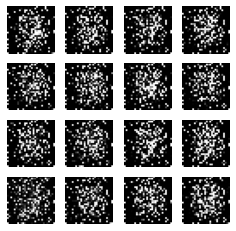

In [9]:
iterations = 40000
batch_size = 128
sample_interval = 1000
train(iterations, batch_size, sample_interval)